In [1]:
#for relative open masslib
import sys
sys.path.append('..')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nhsmasslib.mass import MassSpectrum
from nhsmasslib.mass import VanKrevelen
from nhsmasslib.mass import ErrorTable

#### Load bad spectra

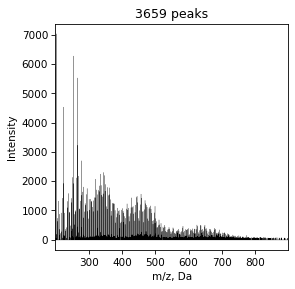

In [3]:
spec = MassSpectrum().load(filename="data/recallibrate.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            )
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
spec.draw(ax=ax)

#### Try to assigne witwout reaallibration

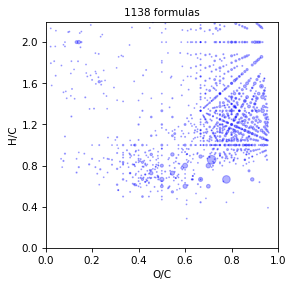

In [4]:
spec = spec.assign()
vk = VanKrevelen(spec.table).draw_scatter()

#### Self-assign by mass-difference statisitc. Take a lot of time

100%|██████████| 1000/1000 [00:00<00:00, 1879.11it/s]


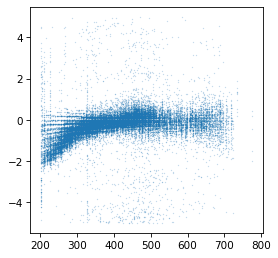

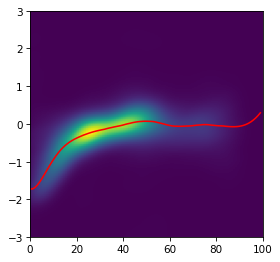

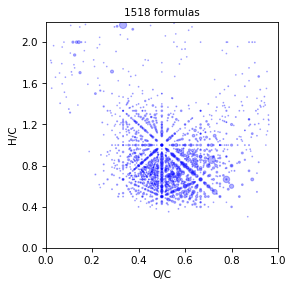

In [5]:
spec = MassSpectrum().load(filename="data/recallibrate.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            )

err = ErrorTable().massdiff_error(spec)
spec = spec.recallibrate(err)
spec = spec.assign()
vk = VanKrevelen(spec.table).draw_scatter()

#### Recallibrate by etalon sample

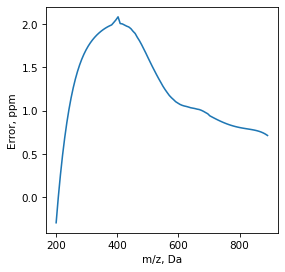

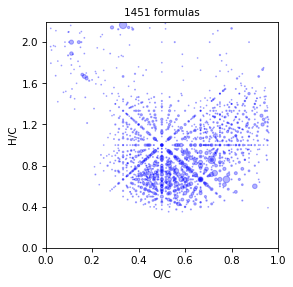

In [6]:
spec = MassSpectrum().load(filename="data/recallibrate.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            )

etalon = MassSpectrum().load(filename="data/etalon.txt",
                            mapper={'mass':'mass', 'intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep=',',
                            )

err = ErrorTable().etalon_error(spec=spec, etalon=etalon)
spec = spec.recallibrate(err)
spec = spec.assign()
vk = VanKrevelen(spec.table).draw_scatter()

#### Self-recallibrate by assign error

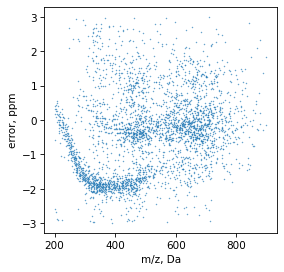

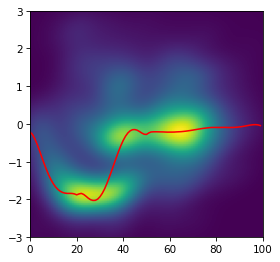

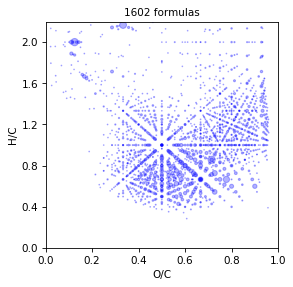

In [7]:
spec = MassSpectrum().load(filename="data/recallibrate.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            )
                            
#Here we need to extend search range to estimate diaposaone of optimal assigment
err = ErrorTable().assign_error(spec)
spec = spec.recallibrate(err)
spec = spec.assign()
vk = VanKrevelen(spec.table).draw_scatter()

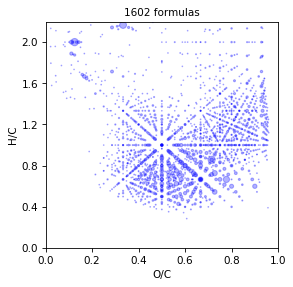

In [8]:
spec = MassSpectrum().load(filename="data/recallibrate.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            )

spec = spec.recallibrate(err)
spec = spec.assign()
vk = VanKrevelen(spec.table).draw_scatter()

#### Set error table by yourself or load from file

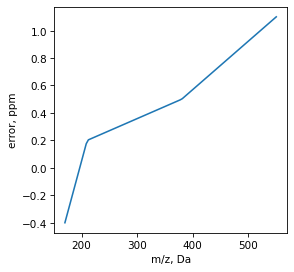

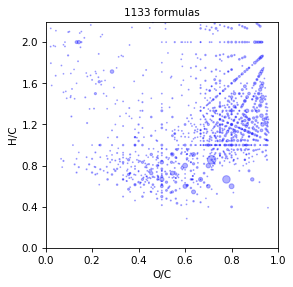

In [9]:
data = [[170, -0.4],
        [210, 0.2],
        [380, 0.5],
        [550, 1.1]]
df = pd.DataFrame(data, columns=['mass','ppm'])

err = ErrorTable(df).extrapolate() #load and extraoplate data for all diapasone
err.show_error()

spec = MassSpectrum().load(filename="data/recallibrate.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            )

spec = spec.recallibrate(err)
spec = spec.assign()
vk = VanKrevelen(spec.table).draw_scatter()

#### Get error for restrict diapasone and extrapolate it for full spectra

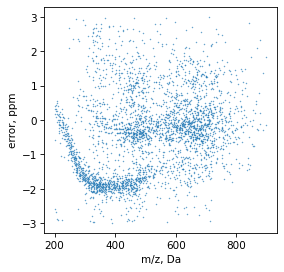

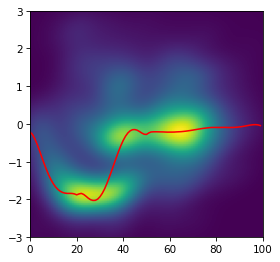

In [10]:
spec = MassSpectrum().load(filename="data/recallibrate.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            )

err = ErrorTable().assign_error(spec)

As at seen form figure above from 450 error may be not correct, so just short our spectr

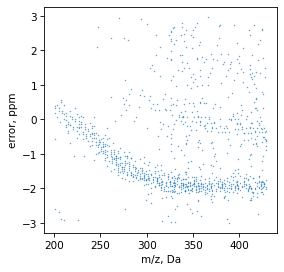

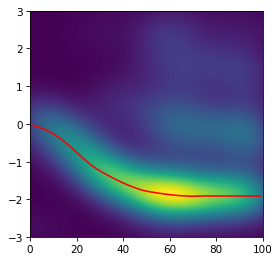

In [11]:
spec = MassSpectrum().load(filename="data/recallibrate.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50,
                            mass_min=0,
                            mass_max=430
                            )

err = ErrorTable().assign_error(spec)

and now we extraoplate this for all data

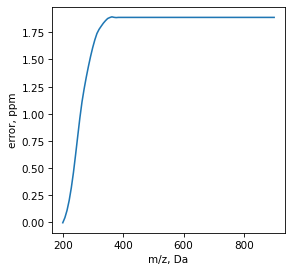

In [12]:
err = err.extrapolate(ranges=(200,900))
err.show_error()

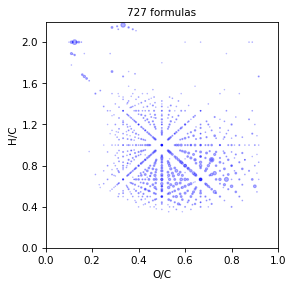

In [13]:
spec = spec.recallibrate(err)
spec = spec.assign()
vk = VanKrevelen(spec.table).draw_scatter()

#### Short form for calc recallibration

If you dont put error table into recallibrate() method. You can directly say how to recallibrate, by default it is by assigment

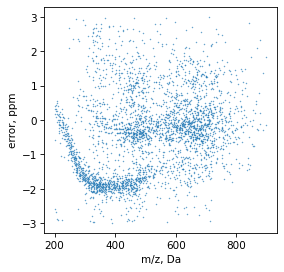

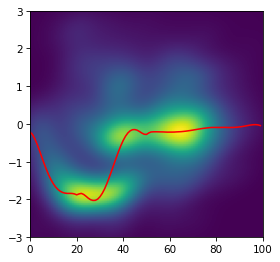

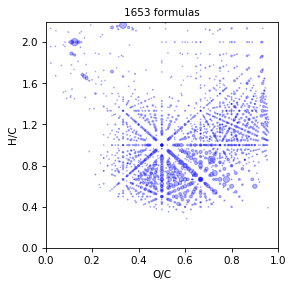

In [14]:
spec = MassSpectrum().load(filename="data/recallibrate.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            ).assign() #it is necessary to assign it first

spec = spec.recallibrate() # it is equal spec.recallibrate(how="assign")
spec = spec.assign()
vk = VanKrevelen(spec).draw_scatter()

or by mass-difference map

100%|██████████| 1000/1000 [00:00<00:00, 1943.43it/s]


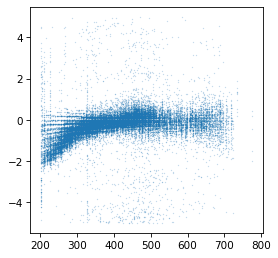

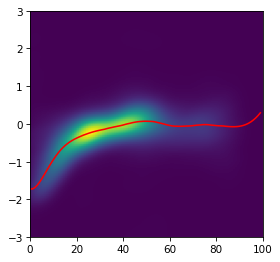

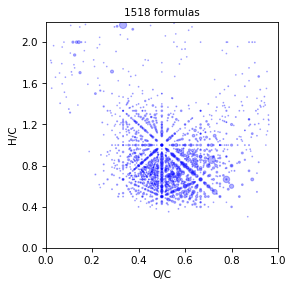

In [15]:
spec = MassSpectrum().load(filename="data/recallibrate.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            ).assign()

spec = spec.recallibrate(how='mdm')
spec = spec.assign()
vk = VanKrevelen(spec).draw_scatter()

and you can send to racallibrate file with etalon (treated and saved by masslib)

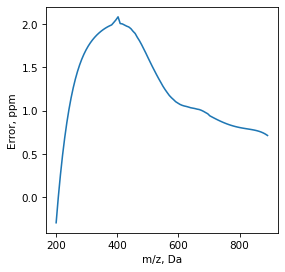

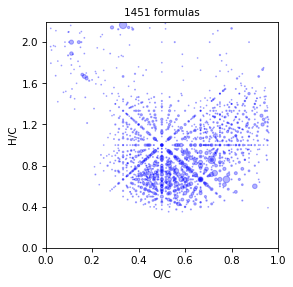

In [16]:
spec = MassSpectrum().load(filename="data/recallibrate.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            ).assign()

spec = spec.recallibrate(how='data/etalon.txt')
spec = spec.assign()
vk = VanKrevelen(spec).draw_scatter()

#### Also use tmds for better result

100%|██████████| 72/72 [00:06<00:00, 10.97it/s]


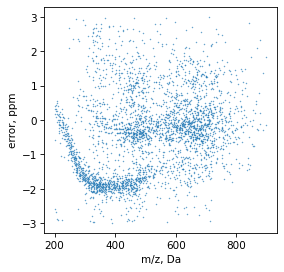

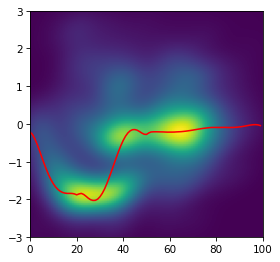

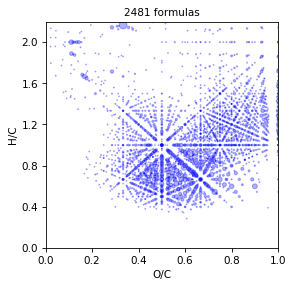

In [17]:
spec = MassSpectrum().load(filename="data/recallibrate.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            ).assign()

spec = spec.recallibrate()
spec = spec.assign()
spec = spec.assign_by_tmds()
vk = VanKrevelen(spec).draw_scatter()